Consider the following DAG:

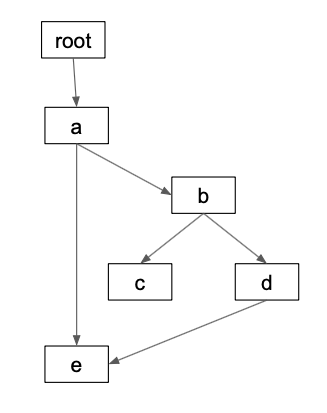

root, a, b, c, d, and e are referred to as nodes. 

The arrows that connect the nodes are called edges.

 A graph is a collection of nodes that are connected by edges.
 
A directed acyclic graph is a special type of graph with properties that’ll be explained in this post.

In [1]:
import networkx as nx
graph = nx.DiGraph()
graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])

DiGraph is short for “directed graph”.

The directed graph is modeled as a list of tuples that connect the nodes. Remember that these connections are referred to as “edges” in graph nomenclature. Take another look at the graph image and observe how all the arguments to add_edges_from match up with the arrows in the graph.

networkx is smart enough to infer the nodes from a collection of edges.

In [2]:
graph.nodes() # should give output as   => NodeView(('root', 'a', 'b', 'e', 'c', 'd'))

NodeView(('root', 'a', 'b', 'e', 'c', 'd'))

##Shortest path

The shortest path between two nodes in a graph is the quickest way to travel from the start node to the end node.

In [3]:
nx.shortest_path(graph, 'root', 'e') # should give output as  => ['root', 'a', 'e']

['root', 'a', 'e']

##Longest path

The dag_longest_path method returns the longest path in a DAG.

In [4]:
nx.dag_longest_path(graph) # should give output as => ['root', 'a', 'b', 'd', 'e']

['root', 'a', 'b', 'd', 'e']

##Topological sorting

Our graph has nodes (a, b, c, etc.) and directed edges (ab, bc, bd, de, etc.). Here’s a couple of requirements that our topological sort need to satisfy:

for ab, a needs to come before b in the ordering

for bc, b needs to come before c

for bd, b needs to come before d

for de, d needs to come before e


In [5]:
list(nx.topological_sort(graph)) # => ['root', 'a', 'b', 'd', 'e', 'c']

['root', 'a', 'b', 'c', 'd', 'e']

Observe that a comes before b, b comes before c, b comes before d, and d comes before e. The topological sort meets all the ordering requirements.

##Checking validity

In [6]:
nx.is_directed(graph) # => True

True

We can also make sure it’s a directed acyclic graph.

In [7]:
nx.is_directed_acyclic_graph(graph) # => True

True

##Multiple roots

A DAG can have multiple root nodes.

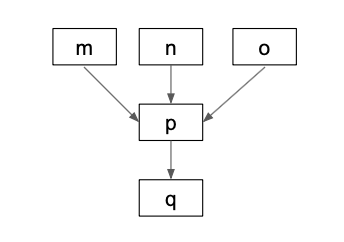

In [8]:
graph = nx.DiGraph()
graph.add_edges_from([('m', 'p'), ('n', 'p'), ('o', 'p'), ('p', 'q')])
nx.is_directed(graph) # => True
nx.is_directed_acyclic_graph(graph) # => True
list(nx.topological_sort(graph)) # => ['o', 'n', 'm', 'p', 'q']

['m', 'n', 'o', 'p', 'q']

##Graphing a DAG (Using matplotlib)

It’s easy to visualized networkx graphs with Matplotlib.





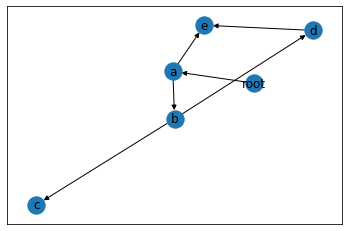

In [14]:
from matplotlib import pyplot as plt

g1 = nx.DiGraph()

g1.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
plt.tight_layout()
nx.draw_networkx(g1, arrows=True)
plt.savefig("g1.png", format="PNG")



visualize our directed, cyclic graph.

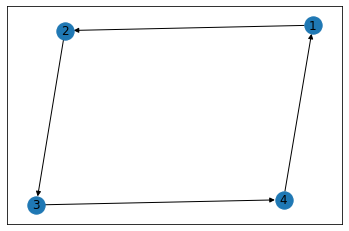

In [16]:
g2 = nx.DiGraph()
g2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
plt.tight_layout()
nx.draw_networkx(g2, arrows=True)
plt.savefig("g2.png", format="PNG")
